**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


**Random Point cloud**
Generally, point clouds are represented by (n × 3) arrays where n is the number of points. Let’s create a point cloud with 5 random points:

In [3]:
n_points =5
pcd = np.random.rand(n_points,3) #uniform distribution over[0,1]
print(pcd)

[[0.11811217 0.76870175 0.31839803]
 [0.22525735 0.06219127 0.28381336]
 [0.87345954 0.94795766 0.43056007]
 [0.69302643 0.13047342 0.68498607]
 [0.61323787 0.32888081 0.02807937]]


we can print these points but it is not efficient if it is large like in most applications. we have to visualize it.

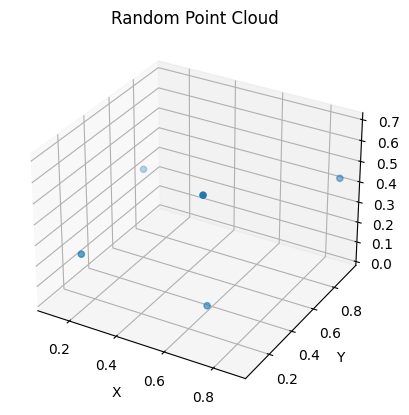

In [4]:
#create figure
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.scatter3D(pcd[:,0],pcd[:,1],pcd[:,2])
# label the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Random Point Cloud")
# display:
plt.show()

In [6]:
#import bunny model from open3d
bunny = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(bunny.path)

Display the 3d model

In [7]:
#visualize it
print("Computing normal and rendering it.")
mesh.compute_vertex_normals()#compute normals for vertices or faces
print(np.asarray(mesh.triangle_normals))
o3d.visualization.draw_geometries([mesh])

Computing normal and rendering it.
[[-0.91027975  0.39349339 -0.12866129]
 [-0.63052673 -0.76656881  0.12168937]
 [-0.9109019   0.41244357  0.01216711]
 ...
 [-0.99697799 -0.02385993  0.07392968]
 [-0.99355905 -0.0188211   0.11174162]
 [-0.99781525  0.06501159  0.01175644]]
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


KeyboardInterrupt: 

we sample 1000 points uniformly from the imported mesh and visualize it:

In [12]:
# Sample 1000 points:
pcd = mesh.sample_points_uniformly(number_of_points=1000)

# visualize:
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


In [ ]:
#save the created pointed cloud in .ply format
# Save into ply file:
o3d.io.write_point_cloud("output/bunny_pcd.ply", pcd)

**Point cloud from RGB-D data**
As the RGB image provides the pixel color, each pixel of the depth image indicates its distance from the camera.

To create point clouds from RGB-D data using Open3D functions just import the two images, create an RGB-D image object and finally compute the point cloud as

In [14]:
#read the color and the depth image
color_raw = o3d.io.read_image("data/rgb.jpg")
depth_raw = o3d.io.read_image("data/depth.png")

#create a rgbd object
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, convert_rgb_to_intensity=False)
# use the rgbd image to create point cloud
#PinholeCameraIntrinsic class stores intrinsic camera matrix, and image height and width.
#Returns the focal length in a tuple of X-axis and Y-axis focal lengths.
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image,o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))

#visualize
o3d.visualization.draw_geometries([pcd])


**From Numpy to Open3D**

In [15]:
# Create numpy pointcloud:
number_points = 2000
pcd_np = np.random.rand(number_points, 3)

# Convert to Open3D.PointCLoud:
pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd_np)  # set pcd_np as the point cloud points

# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


**From Open3D to Numpy**

The point cloud is initially read from a.ply file using the Open3D.io.read_point_cloud() function, which returns an Open3D.PointCloud object. Then, using the NumPy.asarray() function, we can convert the Open3D.PointCloud.points feature that represents the points to a NumPy array. Finally, we display the array we acquired earlier.

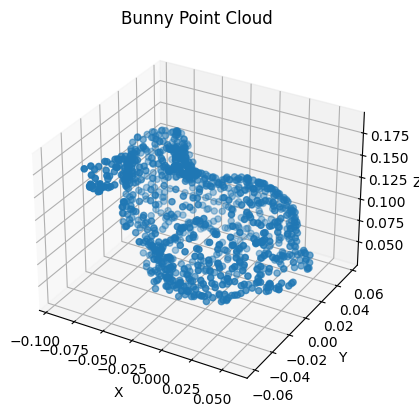

In [16]:
#Read the Bunny Point cloud File
pcd_o3d = o3d.io.read_point_cloud("data/bunny_pcd.ply")
#convert the open3d object to numpy
pcd_np = np.asarray(pcd_o3d.points)

#display using matplotlib
fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.scatter3D(pcd_np[:, 0], pcd_np[:, 2], pcd_np[:, 1])
# label the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Bunny Point Cloud")
# display:
plt.show()
